# KNN
## Glass_Data
### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

C:\Users\PRANAV\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Check out the Data

In [2]:
df = pd.read_csv(r'C:\Users\PRANAV\Desktop\lms\KNN\glass.csv')
df.head()
df.value_counts('Type')

Type
2    76
1    70
7    29
3    17
5    13
6     9
dtype: int64

### EDA

C:\Users\PRANAV\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\PRANAV\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


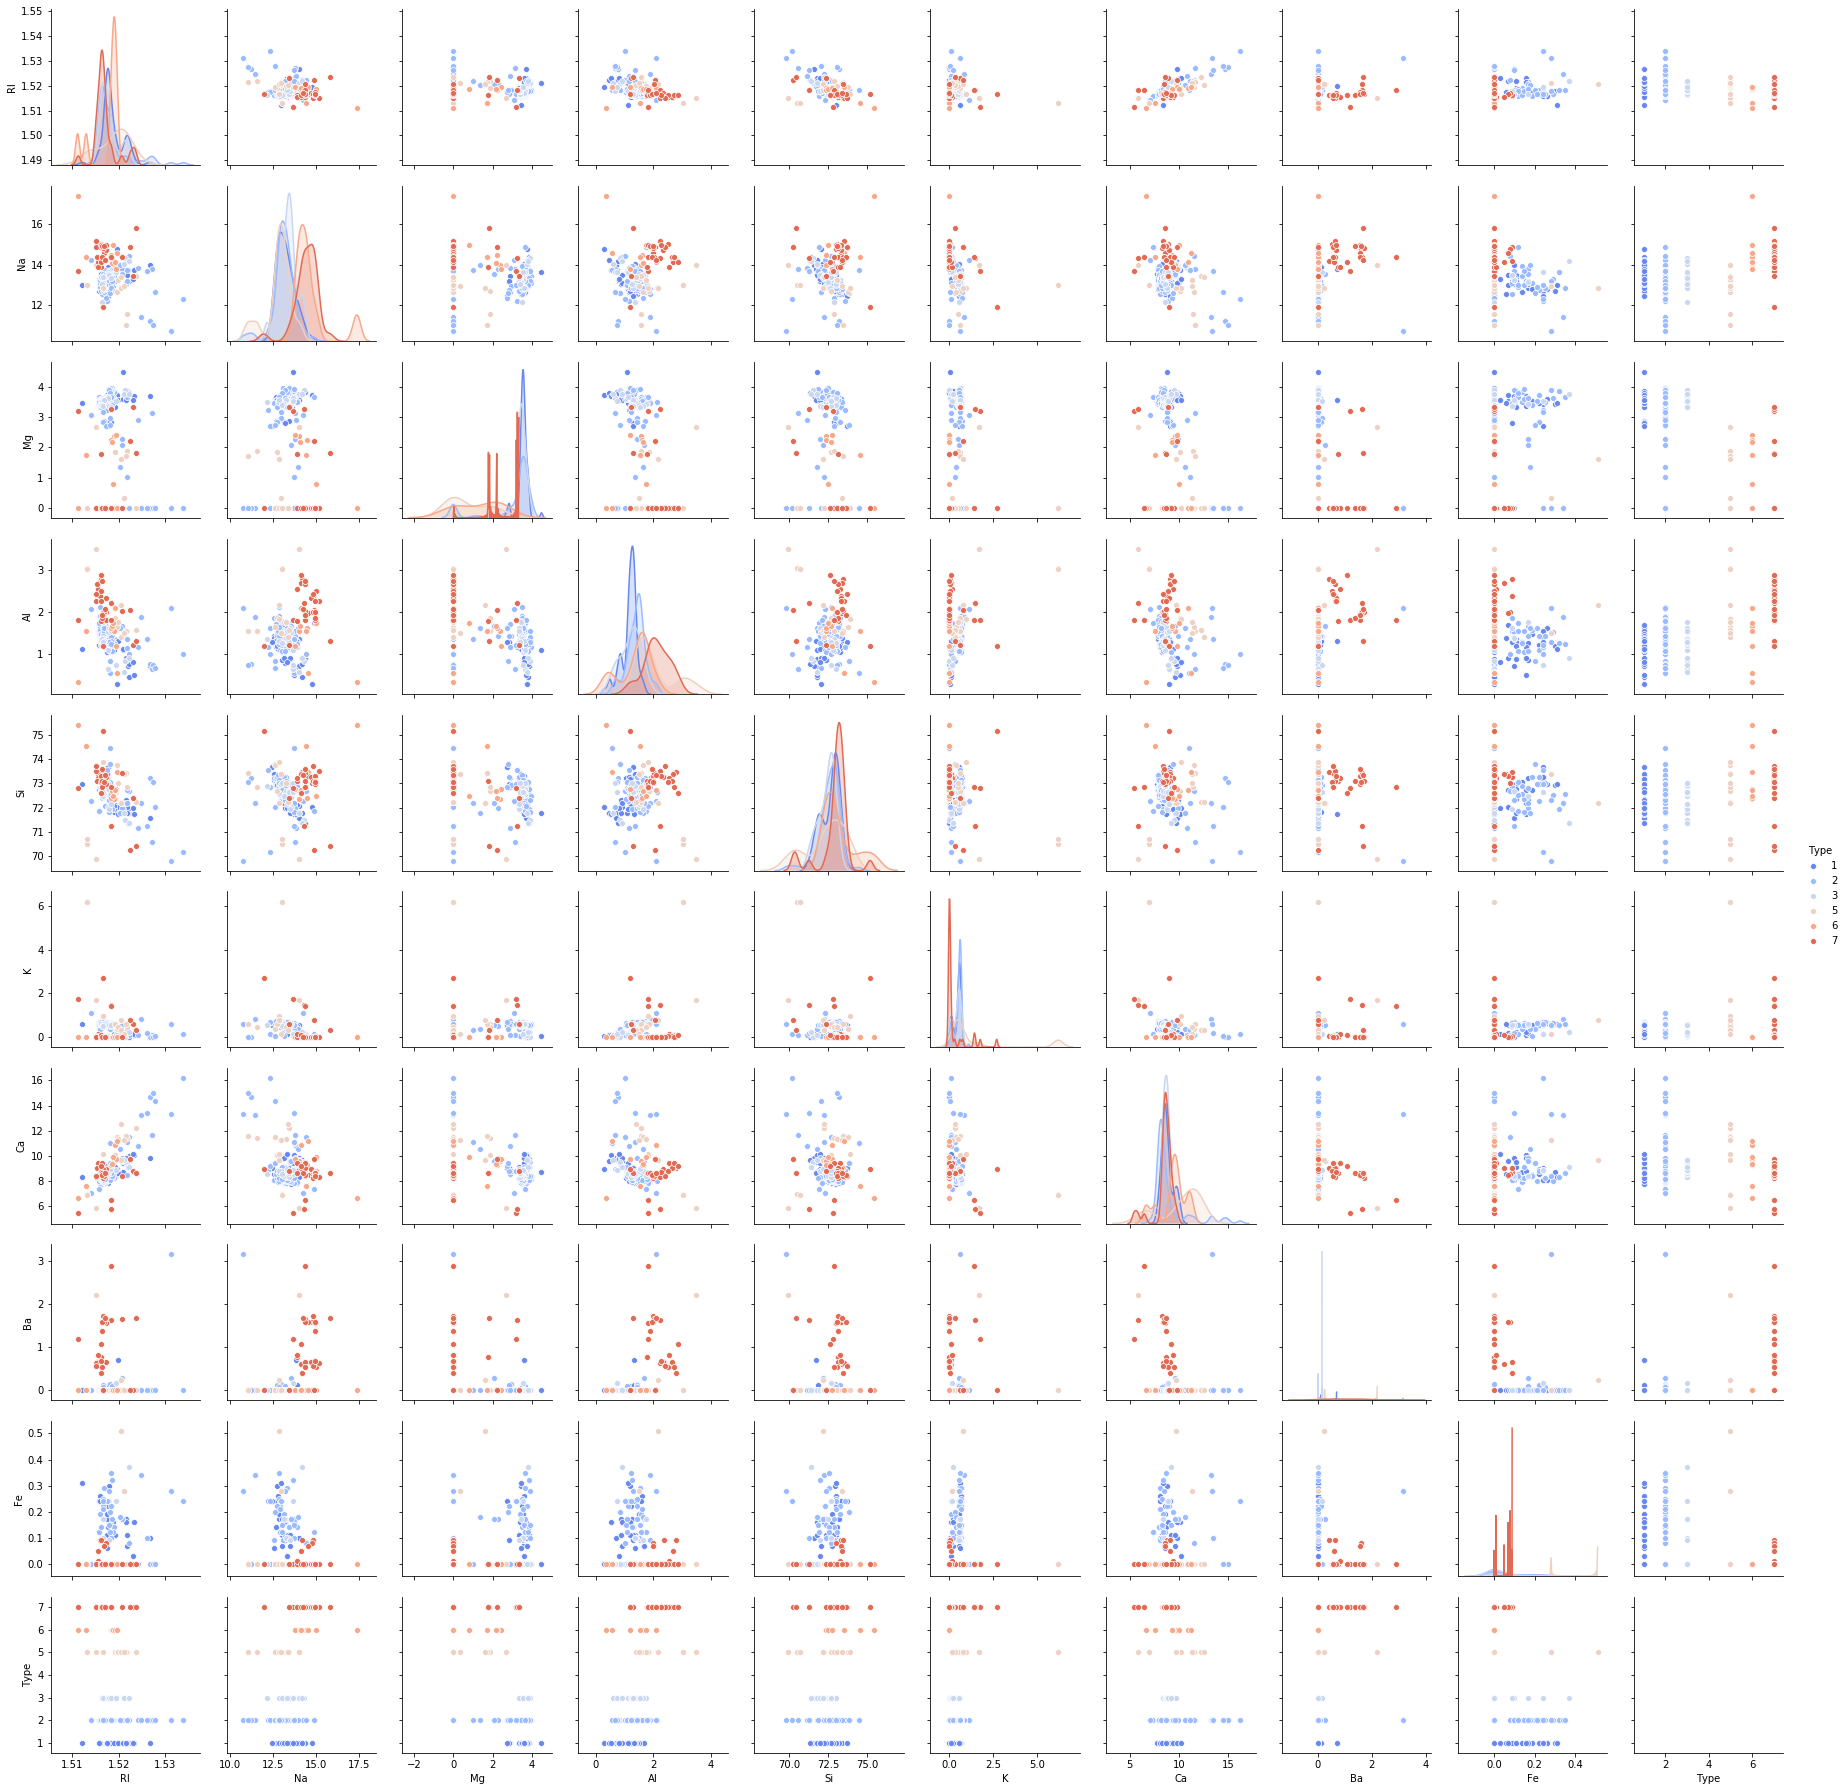

In [3]:
sns.pairplot(df,hue='Type',palette='coolwarm')

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
scaler.fit(df.drop('Type',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
sf = scaler.transform(df.drop('Type',axis=1))

In [7]:
df_scale = pd.DataFrame(sf,columns=df.columns[:-1])

In [8]:
df_scale

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df_scale
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

C:\Users\PRANAV\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\PRANAV\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=Tru

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

C:\Users\PRANAV\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [13]:
pred = knn.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print('with K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('Accuracy: ',np.mean(y_test==pred))

with K=3


[[24  3  3  0  0  0]
 [ 3 14  0  0  0  0]
 [ 4  3  2  0  0  0]
 [ 0  1  0  5  0  0]
 [ 0  0  0  0  4  0]
 [ 0  1  0  1  0  3]]
              precision    recall  f1-score   support

           1       0.77      0.80      0.79        30
           2       0.64      0.82      0.72        17
           3       0.40      0.22      0.29         9
           5       0.83      0.83      0.83         6
           6       1.00      1.00      1.00         4
           7       1.00      0.60      0.75         5

    accuracy                           0.73        71
   macro avg       0.77      0.71      0.73        71
weighted avg       0.73      0.73      0.72        71

Accuracy:  0.7323943661971831
